## Exploring Fiber Strains using Normalisation
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
## COHORT

ebr=['EBR/case01', 'EBR/case02']

## Ronak update on demographics
af_cases = ['10', '18', '19', '20', '23', '26', '27', '31', '25', '34']
af_cases = [f'CT-CRT/case{case}' for case in af_cases]
af_cases = af_cases + ebr

## Ronak update on demograhpics
nonaf_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '24', '28', '29', '30', '32']
nonaf_cases = [f"CT-CRT/case{case}" for case in nonaf_cases]

## f20 cases
f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT/case{case_ind}' for case_ind in f20_cases]
f20_cases = f20_cases + ebr

regions = ["Global", "Post", "Septum", "Lat", "Ant", "Inf"]
regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

regions_v2 = ['global', 'post', 'sept', 'lat', 'ant', 'inf']

# Time Desynchrony

In [5]:
## Load strains for nonAF cases

dataPath = "/home/csi20local/Data/RG_CT_Cases"
dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

## N_strain_type, N_cases, N_regions, N_time_frames
## The below contains strain transients over 10 frames for area, fibre and cross-fibre strains (1st index)
## Each of cases (2nd ind)
## Each region (3rd ind)
## Each time frame (4th ind)
nonaf_strains = np.zeros((3, len(nonaf_cases), 6, 10))

for j in range(0, len(nonaf_cases)):
    case = nonaf_cases[j]
    
    if case in f20_cases:
        filepath = f'{dataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath = f'{dataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    for i in range(0, len(regions)):
        region = regions[i]

#         crt01_data[i, :] = np.loadtxt(f"{dataPath}/{nonaf_cases[0]}/MT-HiRes/SW-0.0-BE-1e-9/area_meanstrains_{region}.txt")
        nonaf_strains[0, j, i, :] = np.loadtxt(f"{filepath}/area_meanstrains_{region}.txt")
        nonaf_strains[1, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[0]
        nonaf_strains[2, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[1]
        

In [6]:
## Load strains for AF cases

dataPath = "/home/csi20local/Data/RG_CT_Cases"
dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

## N_strain_type, N_cases, N_regions, N_time_frames
## The below contains strain transients over 10 frames for area, fibre and cross-fibre strains (1st index)
## Each of cases (2nd ind)
## Each region (3rd ind)
## Each time frame (4th ind)
af_strains = np.zeros((3, len(af_cases), 6, 10))

for j in range(0, len(af_cases)):
    case = af_cases[j]
    
    if case in f20_cases:
        filepath = f'{dataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath = f'{dataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    for i in range(0, len(regions)):
        region = regions[i]
        
        af_strains[0, j, i, :] = np.loadtxt(f"{filepath}/area_meanstrains_{region}.txt")
        af_strains[1, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[0]
        af_strains[2, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[1]
        

## Normlaised Reservoir Strain

We've already seen that globally and regionally, AF cases have reduced strains.
However, when normalising with respect to average global strain, do AF cases have reduced regional strains?

In [10]:
non_af_ranges = nonaf_strains.ptp(axis=3)
af_ranges = af_strains.ptp(axis=3)

non_af_ranges[0, 0, :]/non_af_ranges[0, 0, 0] - 1

array([ 0.        , -0.640437  ,  0.18394088,  0.7688328 ,  0.48378242,
        0.39579132])

In [11]:
## N_strain_metric, N_case, N_regions
res_strain_norm_nonaf = np.zeros((3, len(nonaf_cases), 6))

for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[0, i, :]/non_af_ranges[0, i, 0] - 1    
    res_strain_norm_nonaf[0, i, :] = ans
    
for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[1, i, :]/non_af_ranges[1, i, 0] - 1    
    res_strain_norm_nonaf[1, i, :] = ans
    
for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[2, i, :]/non_af_ranges[2, i, 0] - 1    
    res_strain_norm_nonaf[2, i, :] = ans

In [12]:
res_strain_norm_af = np.zeros((3, len(af_cases), 6))

for i in range(0, len(af_cases)):
    ans = af_ranges[0, i, :]/af_ranges[0, i, 0] - 1
    res_strain_norm_af[0, i, :] = ans
    
for i in range(0, len(af_cases)):
    ans = af_ranges[1, i, :]/af_ranges[1, i, 0] - 1
    res_strain_norm_af[1, i, :] = ans
    
for i in range(0, len(af_cases)):
    ans = af_ranges[2, i, :]/af_ranges[2, i, 0] - 1
    res_strain_norm_af[2, i, :] = ans

# Fiber and Cross-Fiber Strains
## Testing deformation isotropy

In [13]:
af_ranges.shape

(3, 12, 6)

In [14]:
af_ranges[1, 0, :]

array([15.55731699, 11.19100614, 26.22654146, 25.00512665, 16.33773604,
       18.8479576 ])

Text(0.5, 0.06, 'Fiber Reservoir Strain [%]')

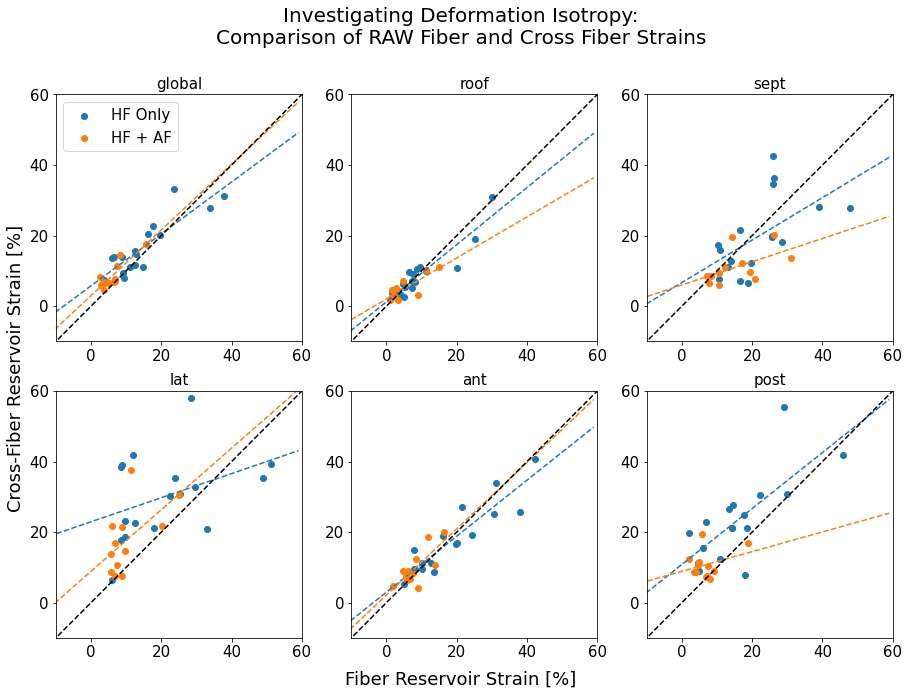

In [51]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

## AF vs nAF, Region, ax + b
coeffs=np.zeros((2,6,2))

for i in range(0, len(regions)):

    ## Scatter plot data points
    fig.axes[i].scatter(non_af_ranges[1, :, i], non_af_ranges[2, :, i], label="HF Only")
    fig.axes[i].scatter(af_ranges[1, :, i], af_ranges[2, :, i], label="HF + AF")
    
    ## Fit lines of best fit
    coeffs[0, i, 0], coeffs[0, i, 1] = np.polyfit(non_af_ranges[1, :, i], non_af_ranges[2, :, i], 1)
    coeffs[1, i, 0], coeffs[1, i, 1] = np.polyfit(af_ranges[1, :, i], af_ranges[2, :, i], 1)
    
    ## Plots lines of best fit
    x = np.arange(-12, 60)
    fig.axes[i].plot(x, coeffs[0, i, 0]*x + coeffs[0, i, 1], ls='--', c='tab:blue')
    fig.axes[i].plot(x, coeffs[1, i, 0]*x + coeffs[1, i, 1], ls='--', c='tab:orange')

    ## Plot y=x
    fig.axes[i].plot(np.arange(-11,70,10), np.arange(-11,70,10), ls='--', c='black')
    fig.axes[i].set_title(regions[i], fontsize=15)
    
    fig.axes[i].tick_params(axis='both', labelsize=15)
    
    fig.axes[i].set_ylim(-10, 60)
    fig.axes[i].set_xlim(-10, 60)

    fig.axes[i].set_yticks(np.arange(0, 70, 20))
    fig.axes[i].set_xticks(np.arange(0, 70, 20))
    
    
ax1.legend(fontsize=15)
    
fig.text(0.5, 0.95, f"Investigating Deformation Isotropy:\nComparison of RAW Fiber and Cross Fiber Strains", 
             ha='center', fontsize=20)
fig.text(0.08, 0.5, "Cross-Fiber Reservoir Strain [%]",
             va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.06, "Fiber Reservoir Strain [%]", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/isotropy_1.png", dpi=200, bbox_inches="tight")

In [56]:
non_af_ranges[1, :, 0]

array([ 3.65757999,  9.09990394, 23.53989182, 17.74985977, 33.9217853 ,
        6.09458364,  6.65154909,  9.31294042, 14.7805203 , 12.83773888,
       19.56991758, 12.38282567, 16.17569054, 11.11781689,  8.84807029,
       12.3833412 , 37.7001088 ])

In [57]:
af_ranges[1, :, 0]

array([15.55731699,  7.45732455,  2.43360449,  4.09656623,  6.56570396,
        3.71831791,  6.85353302,  6.94535609,  5.00087976,  2.71413666,
        3.66301661,  8.26356   ])

array([ 3.65757999,  9.09990394, 23.53989182, 17.74985977, 33.9217853 ,
        6.09458364,  6.65154909,  9.31294042, 14.7805203 , 12.83773888,
       19.56991758, 12.38282567, 16.17569054, 11.11781689,  8.84807029,
       12.3833412 , 37.7001088 , 15.55731699,  7.45732455,  2.43360449,
        4.09656623,  6.56570396,  3.71831791,  6.85353302,  6.94535609,
        5.00087976,  2.71413666,  3.66301661,  8.26356   ])

Text(0.5, 0.06, 'Fiber Reservoir Strain [%]')

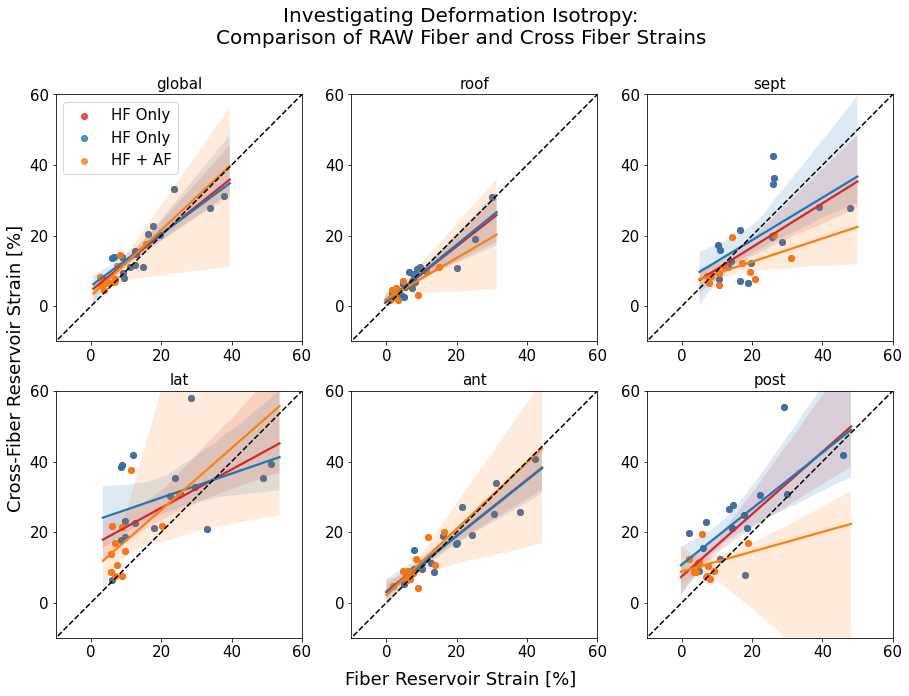

In [67]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

## AF vs nAF, Region, ax + b
coeffs=np.zeros((2,6,2))

for i in range(0, len(regions)):

    ## Scatter plot data points and lines of best fit with CI
    
    ## Entire Cohort
    f1_data_all = np.concatenate((non_af_ranges[1, :, i], af_ranges[1, :, i]))
    f2_data_all = np.concatenate((non_af_ranges[2, :, i], af_ranges[2, :, i]))
    sns.regplot(x=f1_data_all, y=f2_data_all, label="HF Only", 
                ax=fig.axes[i], truncate=False, ci=95, color="tab:red")
    
    ## HF 
    sns.regplot(x=non_af_ranges[1, :, i], y=non_af_ranges[2, :, i], label="HF Only", 
                ax=fig.axes[i], truncate=False, ci=95, color='tab:blue')
    ## HF + AF
    sns.regplot(x=af_ranges[1, :, i], y=af_ranges[2, :, i], label="HF + AF",
                ax=fig.axes[i], truncate=False, ci=95, color='tab:orange')

    ## Plot y=x
    fig.axes[i].plot(np.arange(-11,70,10), np.arange(-11,70,10), ls='--', c='black')
    fig.axes[i].set_title(regions[i], fontsize=15)
    
    fig.axes[i].tick_params(axis='both', labelsize=15)
    
    fig.axes[i].set_ylim(-10, 60)
    fig.axes[i].set_xlim(-10, 60)

    fig.axes[i].set_yticks(np.arange(0, 70, 20))
    fig.axes[i].set_xticks(np.arange(0, 70, 20))
    
    
ax1.legend(fontsize=15)
    
fig.text(0.5, 0.95, f"Investigating Deformation Isotropy:\nComparison of RAW Fiber and Cross Fiber Strains", 
             ha='center', fontsize=20)
fig.text(0.08, 0.5, "Cross-Fiber Reservoir Strain [%]",
             va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.06, "Fiber Reservoir Strain [%]", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/isotropy_1.png", dpi=200, bbox_inches="tight")

## Coefficient of Determination Analysis

In [16]:
## R2 anslysi

from sklearn.metrics import r2_score

for i in range(0, len(regions)):
    
    nonAF_R2 = r2_score(non_af_ranges[1, :, i], non_af_ranges[2, :, i])
    AF_R2 = r2_score(af_ranges[1, :, i], af_ranges[2, :, i])
    
    print(regions[i])
    print("nonAF R2:\t", nonAF_R2)
    print("AF R2:\t\t", AF_R2)

global
nonAF R2:	 0.713946813009895
AF R2:		 0.11896358286593112
roof
nonAF R2:	 0.8367774210996849
AF R2:		 0.6584471884955461
sept
nonAF R2:	 0.07101464739053076
AF R2:		 -0.05738558346982514
lat
nonAF R2:	 -0.5168888657549218
AF R2:		 -2.2800409081586865
ant
nonAF R2:	 0.8217125339132468
AF R2:		 0.1740076563698415
post
nonAF R2:	 -0.0576512362928816
AF R2:		 -1.1718334243864899


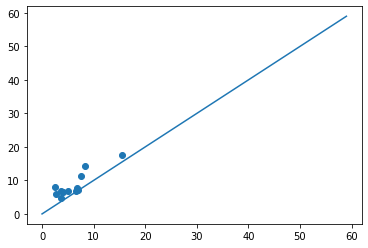

In [17]:
plt.scatter(af_ranges[1, :, 0], af_ranges[2, :, 0])
plt.plot(np.arange(0,60), np.arange(0,60))

# plt.xlim(0,20)
# plt.ylim(0,20)

## 30th MARCH: Normalising area strain vs normalised fiber strains
### Normalising intra case: This removes bias from cases with higher global strain

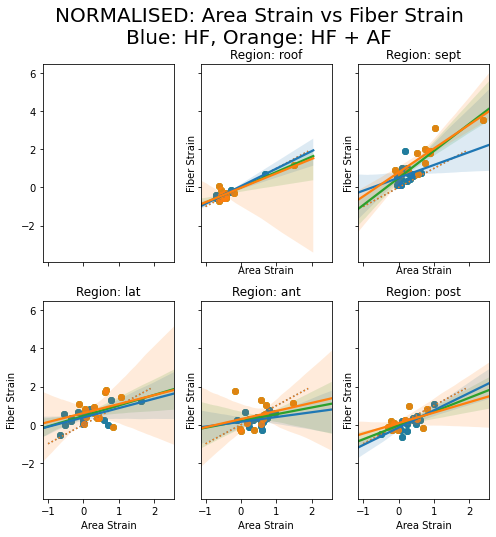

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

fig.suptitle("NORMALISED: Area Strain vs Fiber Strain\nBlue: HF, Orange: HF + AF", fontsize=20)

##nonAF
for i in range(1, len(fig.axes[:])):
    fig.axes[i].scatter(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[1, :, i])
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(res_strain_norm_af[0, :, i], res_strain_norm_af[1, :, i], c='orange')
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    
    ## Line of best fit
#     a,b = np.polyfit(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[1, :, i], 1)
#     x=np.arange(-1,2,0.1)
#     fig.axes[i].plot(x, a*x+b, c='tab:blue')

    ## Whole cohort
    res_strain_all_x = np.concatenate((res_strain_norm_nonaf[0, :, i], res_strain_norm_af[0, :, i]))
    res_strain_all_y = np.concatenate((res_strain_norm_nonaf[1, :, i], res_strain_norm_af[1, :, i]))
    
    sns.regplot(x=res_strain_all_x, y=res_strain_all_y,
                ci=95, ax=fig.axes[i], color='tab:green', truncate=False)

    ## nonAF cohort
    sns.regplot(x=res_strain_norm_nonaf[0, :, i], y=res_strain_norm_nonaf[1, :, i],
                ci=95, ax=fig.axes[i], color='tab:blue', truncate=False)
    ## AF cohort
    sns.regplot(x=res_strain_norm_af[0, :, i], y=res_strain_norm_af[1, :, i],
                ci=95, ax=fig.axes[i], color='tab:orange', truncate=False)

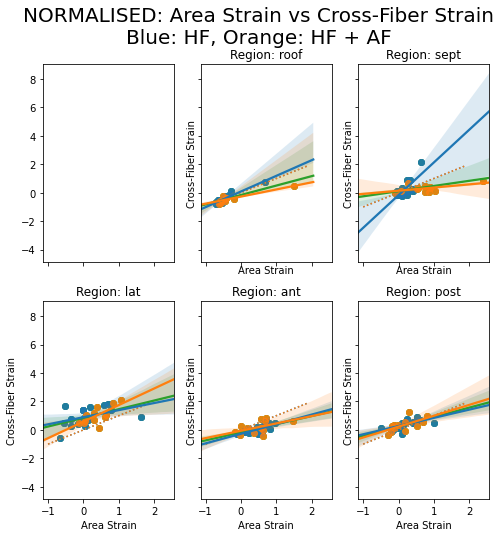

In [23]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

fig.suptitle("NORMALISED: Area Strain vs Cross-Fiber Strain\nBlue: HF, Orange: HF + AF", fontsize=20)

##nonAF
for i in range(1, len(fig.axes[:])):
    fig.axes[i].scatter(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[2, :, i])
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(res_strain_norm_af[0, :, i], res_strain_norm_af[2, :, i], c='orange')
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    
    ## Line of best fit
#     a,b = np.polyfit(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[2, :, i], 1)
#     x=np.arange(-1,2,0.1)
#     fig.axes[i].plot(x, a*x+b, c='tab:blue')

    ## Whole cohort
    res_strain_all_x = np.concatenate((res_strain_norm_nonaf[0, :, i], res_strain_norm_af[0, :, i]))
    res_strain_all_y = np.concatenate((res_strain_norm_nonaf[2, :, i], res_strain_norm_af[2, :, i]))
    
    sns.regplot(x=res_strain_all_x, y=res_strain_all_y,
                ci=95, ax=fig.axes[i], color='tab:green', truncate=False)

    ## nonAF cohort
    sns.regplot(x=res_strain_norm_nonaf[0, :, i], y=res_strain_norm_nonaf[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:blue', truncate=False)
    ## AF cohort
    sns.regplot(x=res_strain_norm_af[0, :, i], y=res_strain_norm_af[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:orange', truncate=False)

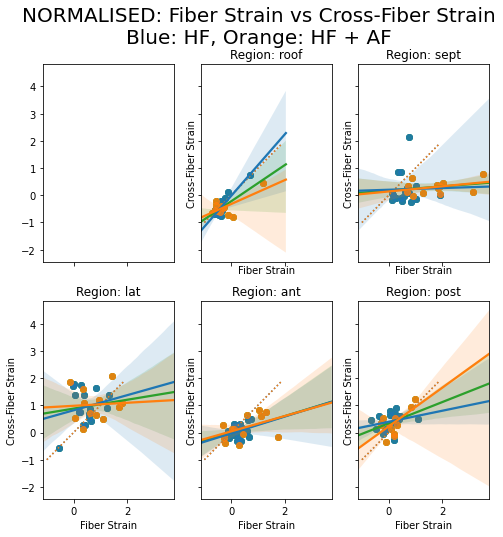

In [24]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

fig.suptitle("NORMALISED: Fiber Strain vs Cross-Fiber Strain\nBlue: HF, Orange: HF + AF", fontsize=20)

##nonAF
for i in range(1, len(fig.axes[:])):
    fig.axes[i].scatter(res_strain_norm_nonaf[1, :, i], res_strain_norm_nonaf[2, :, i])
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Fiber Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(res_strain_norm_af[1, :, i], res_strain_norm_af[2, :, i], c='orange')
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Fiber Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    
    ## Line of best fit
#     a,b = np.polyfit(res_strain_norm_nonaf[1, :, i], res_strain_norm_nonaf[2, :, i], 1)
#     x=np.arange(-1,2,0.1)
#     fig.axes[i].plot(x, a*x+b, c='tab:blue')

    ## Whole cohort
    res_strain_all_x = np.concatenate((res_strain_norm_nonaf[1, :, i], res_strain_norm_af[1, :, i]))
    res_strain_all_y = np.concatenate((res_strain_norm_nonaf[2, :, i], res_strain_norm_af[2, :, i]))
    
    sns.regplot(x=res_strain_all_x, y=res_strain_all_y,
                ci=95, ax=fig.axes[i], color='tab:green', truncate=False)

    ## nonAF cohort
    sns.regplot(x=res_strain_norm_nonaf[1, :, i], y=res_strain_norm_nonaf[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:blue', truncate=False)
    ## AF cohort
    sns.regplot(x=res_strain_norm_af[1, :, i], y=res_strain_norm_af[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:orange', truncate=False)

Comments:
    
   * Roof: no difference between cohorts. f1 and f2 similar
   * Septum: Both cohorts 

## Normalising using Z Score

In [26]:
non_af_ranges.shape

(3, 17, 6)

In [30]:
def z_score(data):
    
    mu = np.mean(data)
    sigma = np.std(data)
    
    z = (data - mu)/sigma
    
    return z

In [31]:
z_score(non_af_ranges[0, :, 0])

array([-1.08259628, -0.74624809,  1.27483745,  0.79634026,  1.2504234 ,
       -0.79472843, -0.61288887, -0.80707613, -1.16491513, -0.09488724,
        0.60215515, -0.31303773,  0.42854255, -0.48528072, -0.61867208,
       -0.29200423,  2.66003612])

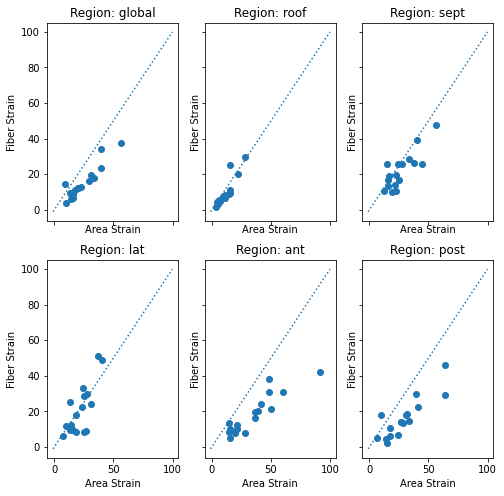

In [42]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

for i in range(0, len(fig.axes[:])):
    
    fig.axes[i].scatter(non_af_ranges[0, :, i], non_af_ranges[1, :, i])
    fig.axes[i].plot(np.arange(-1,100,0.1), np.arange(-1,100,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")

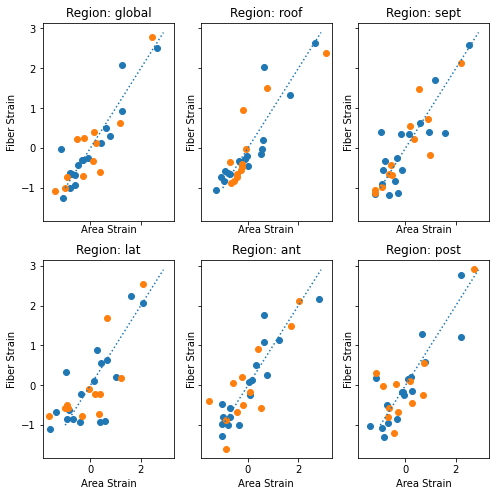

In [41]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

for i in range(0, len(fig.axes[:])):
    
    fig.axes[i].scatter(z_score(non_af_ranges[0, :, i]), z_score(non_af_ranges[1, :, i]))
    fig.axes[i].plot(np.arange(-1,3,0.1), np.arange(-1,3,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(z_score(af_ranges[0, :, i]), z_score(af_ranges[1, :, i]))

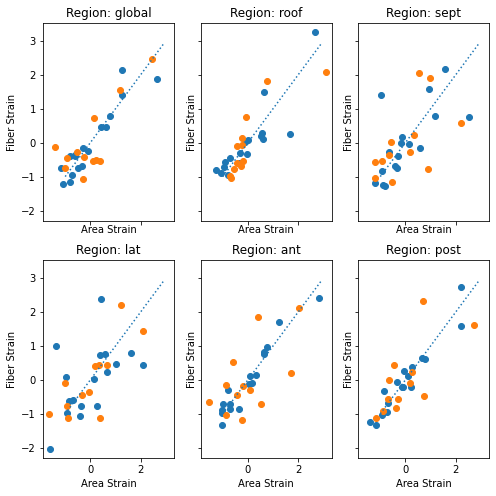

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

for i in range(0, len(fig.axes[:])):
    
    fig.axes[i].scatter(z_score(non_af_ranges[0, :, i]), z_score(non_af_ranges[2, :, i]))
    fig.axes[i].plot(np.arange(-1,3,0.1), np.arange(-1,3,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(z_score(af_ranges[0, :, i]), z_score(af_ranges[2, :, i]))

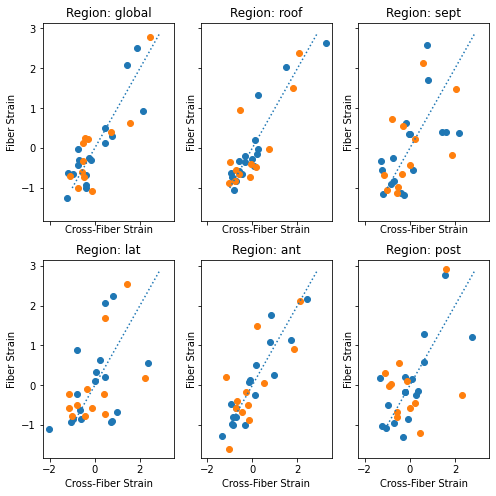

In [43]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

for i in range(0, len(fig.axes[:])):
    
    fig.axes[i].scatter(z_score(non_af_ranges[2, :, i]), z_score(non_af_ranges[1, :, i]))
    fig.axes[i].plot(np.arange(-1,3,0.1), np.arange(-1,3,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Cross-Fiber Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(z_score(af_ranges[2, :, i]), z_score(af_ranges[1, :, i]))

In [47]:
non_af_ranges.shape

(3, 17, 6)

In [48]:
## global area strain stats

mu_a = non_af_ranges[0, :, 0].mean()
sigma_a = non_af_ranges[0, :, 0].std()

## global fiber strain stats

mu_f1 = non_af_ranges[1, :, 0].mean()
sigma_f1 = non_af_ranges[1, :, 0].std()

## global cross fiber strain stats

mu_f2 = non_af_ranges[1, :, 0].mean()
sigma_f2 = non_af_ranges[1, :, 0].std()


In [49]:
def z_score_provide_stats(data, mu, sigma):
     
    z = (data - mu)/sigma
    
    return z

In [50]:
## Try plotting using global mu and sigma